In [9]:
# 손실함수-> 오차제곱함 구현
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [10]:
# 신경망의 출력결과(y -> 소프트맥스 함수로 구한 결과로 생각하여 이로 인해 확률을 갖는다고 생각하기), 정답 레이블(t)이 같은 경우 오차가 적기에 값이 작음-> 정답에 가까움
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [11]:
# 신경망의 출력결과(y -> 소프트맥스 함수로 구한 결과로 생각하기), 정답 레이블(t)가 서로 다른 경우 오차가 크기에 값이 크게 나온다.
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

In [12]:
# 손실함수 -> 교차 엔트로피 오차 => 정답레이블이 1인 경우에(t == 1) 실질적인 연산이 이루어짐.
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [13]:
# 정답 레이블이 1인 경우(t == 1), 신경망 출력(y)이 크면(확률이 크면) 오차가 적음
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [14]:
# 정답 레이블이 1인 경우(t == 1), 신경망 출력(y)이 작으면(확률이 작으면) 오차가 큼
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 불러오기
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1차원 배열로 변환 (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# 원-핫 인코딩
t_train = tf.keras.utils.to_categorical(t_train, 10)
t_test = tf.keras.utils.to_categorical(t_test, 10)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000, 10)


ModuleNotFoundError: No module named 'tensorflow'

In [142]:
# 미니배치 형성 -> 수많은 데이터 수에 각각 해당하는 손실함수를 계산하는 것이 연산 손실이 발생하기에 일부를 무작위로 추려 학습시켜 근사치로 활용
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


In [143]:
np.random.choice(60000, 10) # 0~59999 중 무작위로 10개 고름 // 위에서 사용한 np.random.choice에 대한 설명

array([20667, 17870,  4819, 36620, 59810, 48759, 44419, 36872,  9435,
       17966])

In [144]:
# 배치용 교차 엔트로피 오차 구현하기 -> 데이터가 N개가 들어오는 경우 N으로 나눠(정규화) Inpout으로 데이터가 몇개가 들어오든 일정한 수치화를 통해 비교가 가능하게 함.
# 데이터가 한개가 들어오든 배치로 묶여 들어오든 상관 없음.
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size
# y(신경망 출력)가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우를 reshape 함수로 데이터의 형상을 바꿈
# 그 후 정규화를 통해서 이미지 1장 당 평균의 교차 엔트로피 오차를 계산함.

In [145]:
# 위의 함수 구현과 다른 점
# 원-핫 인코딩을 통해서 정답이 아닌 레이블 0은 교차 엔트로피 오차도 0이기에 이를 무시하여 연산 손실을 방지하였음

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# np.arange(batch_size) : 0~ batch_size-1까지의 배열 생성
# t = 정답 레이블
# y[np.arange(batch_size), t] = 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출함.

In [146]:
# 미분-> 해당 순간의 변화량을 구함
# 해당 구현은 상당히 좋지 않은 구현임-> 해당 순간에서의 변화량이 아님
# 더불어 반올림 오차 문제 발생 -> 부동소수점 성질에 의해서 소수점 8자리 이하의 수는 생략되기에 오차가 발생함.
# 해당 미분을 수치 미분이라고 함
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [147]:
# 수치 미분에서의 오차를 줄이기 위해서 중심 차분/ 중앙 차분을 활요하자 -> 이전 구현은 전방 차분임
# (x + h), (x-h) 이 두가지의 차분을 구하고자 함
# 수치 미분은 우리가 수학시간에 배운 것을 완전히 구현하지 못하니 근사치로 계산하고자 함.

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [148]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

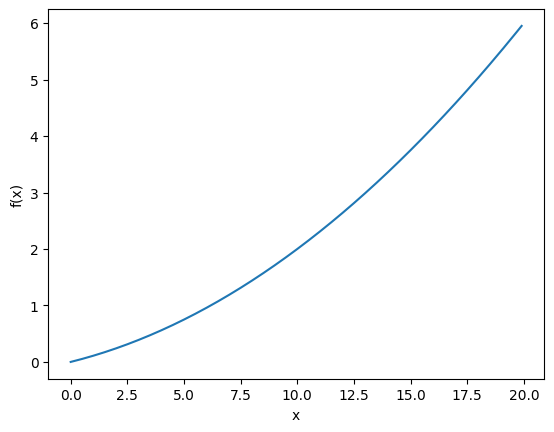

In [149]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(0.0, 20., 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [150]:
numerical_diff(function_1, 5)


0.1999999999990898

In [151]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


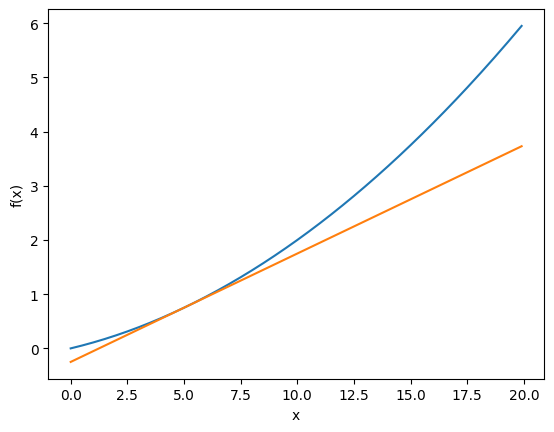

In [152]:
# 접선의 함수를 구하는 함수 -> 저자 깃허브에서 가져옴, 책에 구현부분 없음.
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
        h = 1e-4 # 0.0001
        return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
        return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
        d = numerical_diff(f, x)
        print(d)
        y = f(x) - d*x
        return lambda t: d*t + y
        
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


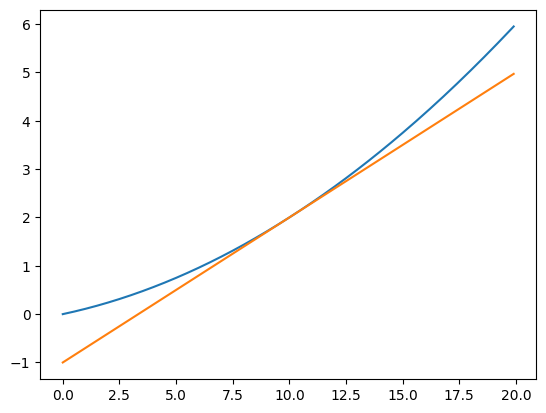

In [153]:
tf2 = tangent_line(function_1, 10)
y3 = tf2(x)

plt.plot(x, y)
plt.plot(x, y3)
plt.show()

In [154]:
# 편미분 구현하기
def function_2(x):
    return np.sum(x ** 2)
    # return x[0] ** 2 + x[1]**2


In [155]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [156]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [157]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] =tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad
        

In [158]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


In [159]:
# 경사법(경사 하강법: 최소를 찾아가는 과정, 경사 상승법: 최대를 찾아가는 법 => 이 둘의 차이 사실 없다. 사실상 서로 부호만 반전 시켜주면 본질은 같음. )
# f: 최적화 대상 함수, init_x = 초기값, lr: learning rate, 학습률, step_num: 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [160]:
# 위에서 구현한 경사법은 극소를 구할 수도 최소를 구할 수도 있음.

def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num =100)

# 해당 코드 실행결과: 거의 0에 가까운 결과 -> 실제로 최소값이 (0,0)이기에 최소임을 볼 수 있다.

array([-6.11110793e-10,  8.14814391e-10])

In [161]:
# 3자에서 소프트맥스함수 가져옴 -> 출력층이 아닌 층에서의 활성화 함수 -> 분류에서 사용
def softmax(a):
    c = np.max(a)

    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a

    return y

In [162]:
# 앞서 구현한 numerical_gradient은 다차원 배열 처리가 불가능 -> 저자 깃허브에서 가중치 매개변수 W가 다차원 배열이여도 처리가 가능하도록 구현한 코드 가져옴
def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [163]:
import sys, os
sys.path.append(os.pardir)
import numpy as np


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
    
net = simpleNet()
print(net.W)

[[ 1.38077965 -0.2970333  -1.60835351]
 [-1.69311197 -0.2114989   0.02279291]]


In [164]:
x = np.array([0.6, 0.9])
p  = net.predict(x)

print(p)
print(np.argmax(p))

t = np.array([1,0,0])
net.loss(x,t)

[-0.69533298 -0.36856899 -0.94449848]
1


3.1305711373329643

In [165]:
import numpy as np

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
    
net = simpleNet()
print("Initial weights: \n", net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)

print("Prediction:", p)
print("Predicted class:", np.argmax(p))

t = np.array([0, 1, 0])
loss = net.loss(x, t)
print("Loss:", loss)


Initial weights: 
 [[-0.24983619  0.83486737  1.96830284]
 [-0.62580685  1.54716915  0.02716166]]
Prediction: [-0.71312788  1.89337266  1.2054272 ]
Predicted class: 1
Loss: 0.45514374269474855


In [166]:
def f(W):
    return net.loss(x, t)
# f = lambda w: net.loss(x, t) 람다식 활용해서 간결하게 바꿈
dW = numerical_gradient(f, net.W) 
print(dW)

[[ 0.0280864  -0.21938593  0.19129954]
 [ 0.0421296  -0.3290789   0.2869493 ]]


In [167]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.0280864  -0.21938593  0.19129954]
 [ 0.0421296  -0.3290789   0.2869493 ]]


In [168]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [169]:
import numpy as np

# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax 함수 정의
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    else:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))
    return x

# 교차 엔트로피 오차 함수 정의
def cross_entropy_error(y, t):
    if y.ndim == 1:  # 데이터가 1차원일 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    if t.size == y.size:  # 레이블이 원-핫 인코딩일 경우
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    # 여기에서 t.astype(int)를 추가하여 t를 정수형으로 변환합니다.
    return -np.sum(np.log(y[np.arange(batch_size), t.astype(int)] + 1e-7)) / batch_size

# 수치적 기울기 계산 함수 정의
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    # np.ndindex(x.shape)을 사용하여 모든 인덱스를 반복합니다.
    for idx in np.ndindex(x.shape):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 원래 값 복원

    return grad

# 2차 신경망 구현

class TwoLayerNet:
    def __init__ (self, input_size, hidden_size, output_size, weight_init_std = 0.01): # 초기화를 수행하는 함수, 매개변수 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
        self.params = {} # 신경망의 매개변수를 보관하는 딕셔너리 변수
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size) # 1번째 층의 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 2번째 층의 가중치
        self.params['b2'] = np.zeros(output_size) # 2번째 층의 가중치

    def predict(self, x):# 예측(추론 진행)-> x는 이미지 데이터
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):   # 손실 함수의 값을 구함
        y = self.predict(x) # x는 이미지 데이터

        return cross_entropy_error(y, t) # t는 정답 레이블
    
    def accuracy(self, x, t): # 정확도 구하기
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t): # 가중치 매개변수의 기울기를 구함 ->  가중치 매개변수의 손실함수에 대한 기울기를 구하는 것임
        loss_W = lambda W: self.loss(x, t)

        grads = {} # 기울기 보관하는 딕셔너리 변수, numerical_gradient 반환값
        # 외부의 numerical_gradient 함수를 사용하여 기울기를 계산합니다.
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 1번째 층의 가중치의 기울기
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 1번째 층의 편향의 기울기
        grads['W2'] = numerical_gradient(loss_W, self.params['W2']) # 2번째 층의 가중치의 기울기
        grads['b2'] = numerical_gradient(loss_W, self.params['b2']) # 2번째 층의 편향의 기울기

        return grads

# 네트워크 초기화
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 입력 데이터와 타겟 데이터
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

# 기울기 계산
grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(784, 50)
(50,)
(50, 10)
(10,)


In [170]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size=10)# 입력층 뉴런 수: 784개, 은닉층 뉴런 수: 100개, 출력층 뉴런 수: 10개
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [171]:
x = np.random.randn(100, 784)
y = net.predict(x)

In [172]:
x  =np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [173]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 불러오기
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1차원 배열로 변환 (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# 원-핫 인코딩
t_train = tf.keras.utils.to_categorical(t_train, 10)
t_test = tf.keras.utils.to_categorical(t_test, 10)

print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000, 10)


(60000, 784)
(60000, 10)


In [174]:
# 미니배치를 통한 신경망 학습 구현하기
# import numpy as np

# import tensorflow as tf
# from tensorflow.keras.datasets import mnist

# # MNIST 데이터셋 불러오기
# (x_train, t_train), (x_test, t_test) = mnist.load_data()

# # 데이터 정규화
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # 1차원 배열로 변환 (28x28 -> 784)
# x_train = x_train.reshape((x_train.shape[0], 784))
# x_test = x_test.reshape((x_test.shape[0], 784))

# # 원-핫 인코딩
# t_train = tf.keras.utils.to_categorical(t_train, 10)
# t_test = tf.keras.utils.to_categorical(t_test, 10)

train_loss_list = []

#하이퍼파라미터 
iters_num = 5 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 10 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [175]:

# 미니배치를 통한 신경망 학습 구현하기
# import numpy as np

# import tensorflow as tf
# from tensorflow.keras.datasets import mnist

# # MNIST 데이터셋 불러오기
# (x_train, t_train), (x_test, t_test) = mnist.load_data()

# # 데이터 정규화
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# # 1차원 배열로 변환 (28x28 -> 784)
# x_train = x_train.reshape((x_train.shape[0], 784))
# x_test = x_test.reshape((x_test.shape[0], 784))

# # 원-핫 인코딩
# t_train = tf.keras.utils.to_categorical(t_train, 10)
# t_test = tf.keras.utils.to_categorical(t_test, 10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

#하이퍼파라미터 
iters_num = 5 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 10 # 미니배치 크기
learning_rate = 0.1

# 1epoch당 반복 수
iter_per_epoch = max(train_size/ batch_size, 1)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 1 epoch당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ',' + str(test_acc))

train acc, test acc | 0.10218333333333333,0.101
